# PDI
## Processamento de imagens coloridas
### Eduardo Henrique Farias Silva

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

> ### Selecionar uma imagem da Internet de algum filme que possua um fundo uniforme (azul ou verde, por ex.) e aplicar a técnica de _chroma-keying_.

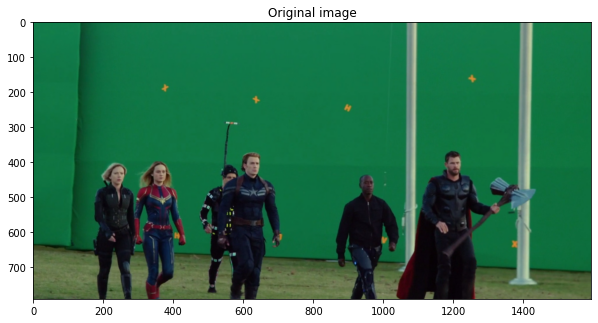

In [2]:
img = cv2.cvtColor(cv2.imread('avengers.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 15))
plt.imshow(img)
plt.title('Original image')
plt.show()

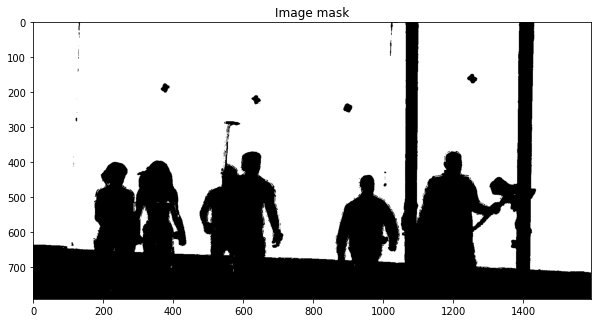

In [3]:
lower_green = np.array([0, 50, 0])
upper_green = np.array([25, 130, 90])

mask = cv2.inRange(img, lower_green, upper_green)

plt.figure(figsize=(10, 15))
plt.imshow(mask, cmap='gray')
plt.title('Image mask')
plt.show()

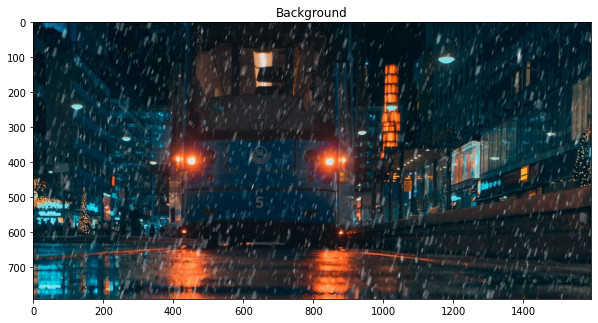

In [4]:
background = cv2.cvtColor(cv2.imread('rain_transport_city.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 15))
plt.imshow(background)
plt.title('Background')
plt.show()

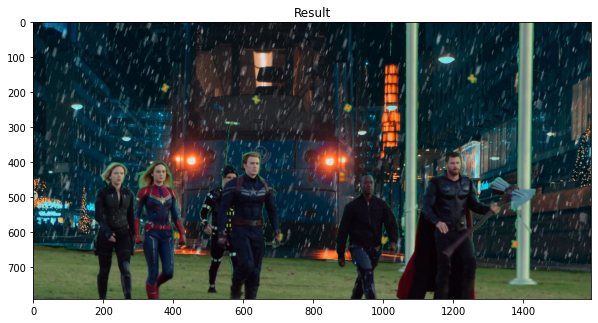

In [5]:
img[mask != 0] = [0, 0, 0]
background[mask == 0] = [0, 0, 0]

final = background + img

plt.figure(figsize=(10, 15))
plt.imshow(final)
plt.title('Result')
plt.show()

> ### Carregar uma imagem RGB e aplicar um filtro de borramento.

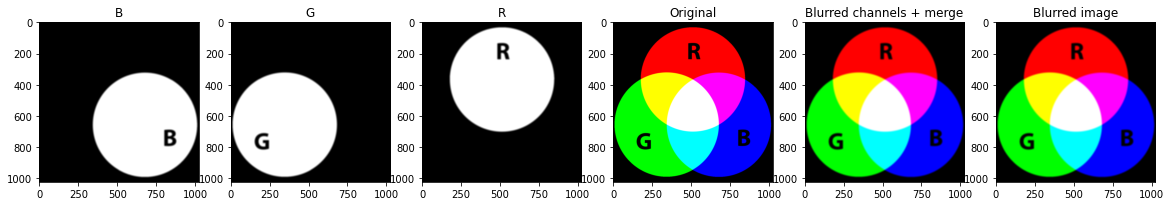

In [6]:
rgb = cv2.cvtColor(cv2.imread('rgb.png'), cv2.COLOR_BGR2RGB)
(R, G, B) = cv2.split(rgb)

B = cv2.blur(B, (12, 12))
G = cv2.blur(G, (12, 12))
R = cv2.blur(R, (12, 12))

plt.figure(figsize=(20, 25))
plt.subplot(1,6,1); plt.imshow(B, cmap='gray'); plt.title('B')
plt.subplot(1,6,2); plt.imshow(G, cmap='gray'); plt.title('G')
plt.subplot(1,6,3); plt.imshow(R, cmap='gray'); plt.title('R')
plt.subplot(1,6,4); plt.imshow(rgb); plt.title('Original')
plt.subplot(1,6,5); plt.imshow(cv2.cvtColor(cv2.merge([B, G, R]), cv2.COLOR_BGR2RGB)); plt.title('Blurred channels + merge')
plt.subplot(1,6,6); plt.imshow(cv2.blur(rgb, (12, 12))); plt.title('Blurred image')
plt.show()

> ### Carregar uma imagem RGB e aplicar um filtro de realçe de bordas.

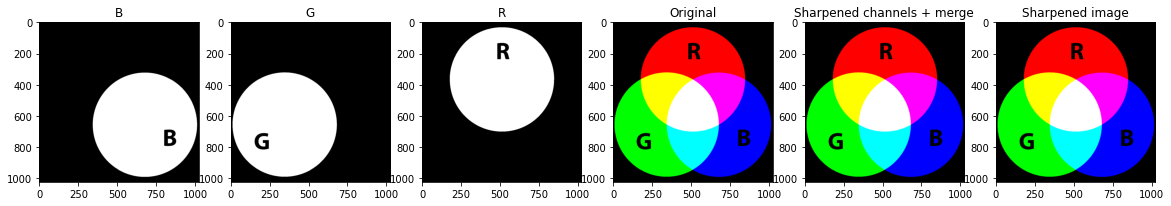

In [7]:
rgb = cv2.cvtColor(cv2.imread('rgb.png'), cv2.COLOR_BGR2RGB)
(R, G, B) = cv2.split(rgb)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

R = cv2.filter2D(R, -1, kernel)
G = cv2.filter2D(G, -1, kernel)
B = cv2.filter2D(B, -1, kernel)

plt.figure(figsize=(20, 25))
plt.subplot(1,6,1); plt.imshow(B, cmap='gray'); plt.title('B')
plt.subplot(1,6,2); plt.imshow(G, cmap='gray'); plt.title('G')
plt.subplot(1,6,3); plt.imshow(R, cmap='gray'); plt.title('R')
plt.subplot(1,6,4); plt.imshow(rgb); plt.title('Original')
plt.subplot(1,6,5); plt.imshow(cv2.cvtColor(cv2.merge([B, G, R]), cv2.COLOR_BGR2RGB)); plt.title('Sharpened channels + merge')
plt.subplot(1,6,6); plt.imshow(cv2.filter2D(rgb, -1, kernel)); plt.title('Sharpened image')
plt.show()

> ### Segmentar cada um dos 5 elementos distintos da imagem 'chips.png' do diretório da disciplina.

In [8]:
def filterImage(image, hsv, lower, upper):
    return cv2.bitwise_and(image, image, mask=cv2.inRange(hsv, lower, upper))

In [9]:
# Blue
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])
# Orange
lower_orange = np.array([0, 100, 100])
upper_orange = np.array([15, 255, 255])
# Red
lower_red = np.array([160,100,20])
upper_red = np.array([180,255,255])
# Yellow
lower_yellow = np.array([20,100,100])
upper_yellow = np.array([40,255,255])
# Green
lower_green = np.array([50,100,100])
upper_green = np.array([80,255,255])

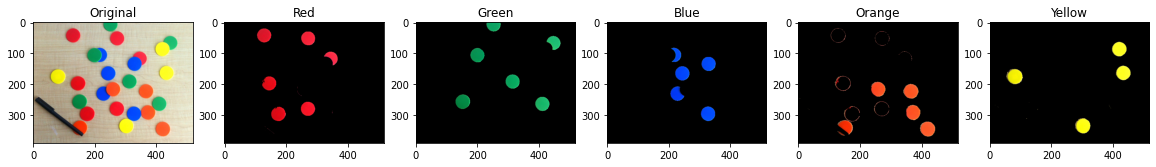

In [10]:
chips = cv2.imread('chips.png')
hsv = cv2.cvtColor(chips, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(20, 30))
plt.subplot(1,6,1); plt.imshow(cv2.cvtColor(chips, cv2.COLOR_BGR2RGB)); plt.title('Original')
plt.subplot(1,6,2); plt.imshow(cv2.cvtColor(filterImage(chips, hsv, lower_red, upper_red), cv2.COLOR_BGR2RGB)); plt.title('Red')
plt.subplot(1,6,3); plt.imshow(cv2.cvtColor(filterImage(chips, hsv, lower_green, upper_green), cv2.COLOR_BGR2RGB)); plt.title('Green')
plt.subplot(1,6,4); plt.imshow(cv2.cvtColor(filterImage(chips, hsv, lower_blue, upper_blue), cv2.COLOR_BGR2RGB)); plt.title('Blue')
plt.subplot(1,6,5); plt.imshow(cv2.cvtColor(filterImage(chips, hsv, lower_orange, upper_orange), cv2.COLOR_BGR2RGB)); plt.title('Orange')
plt.subplot(1,6,6); plt.imshow(cv2.cvtColor(filterImage(chips, hsv, lower_yellow, upper_yellow), cv2.COLOR_BGR2RGB)); plt.title('Yellow')
plt.show()